In [1]:
#Covid19 Data Analysis

In [65]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# import the datasets 
dataset = pd.read_csv("time_series_covid19_confirmed_global.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433


In [26]:
dataset.shape

(271, 348)

In [67]:
#delete the useless columns
df = dataset.drop(["Lat", "Long","Province/State"], axis= 1, inplace = True)

In [68]:
dataset.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405
1,Albania,0,0,0,0,0,0,0,0,0,...,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727
2,Algeria,0,0,0,0,0,0,0,0,0,...,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311
3,Andorra,0,0,0,0,0,0,0,0,0,...,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983
4,Angola,0,0,0,0,0,0,0,0,0,...,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433


In [69]:
# Aggregate the rows by the country
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()

In [70]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,50013,50190,50433,50655,50810,50886,51039,51280,51350,51405
Albania,0,0,0,0,0,0,0,0,0,0,...,53425,53814,54317,54827,55380,55755,56254,56572,57146,57727
Algeria,0,0,0,0,0,0,0,0,0,0,...,95659,96069,96549,97007,97441,97857,98249,98631,98988,99311
Andorra,0,0,0,0,0,0,0,0,0,0,...,7602,7633,7669,7699,7756,7806,7821,7875,7919,7983
Angola,0,0,0,0,0,0,0,0,0,0,...,16686,16802,16931,17029,17099,17149,17240,17296,17371,17433


In [71]:
corona_dataset_aggregated.shape

(191, 344)

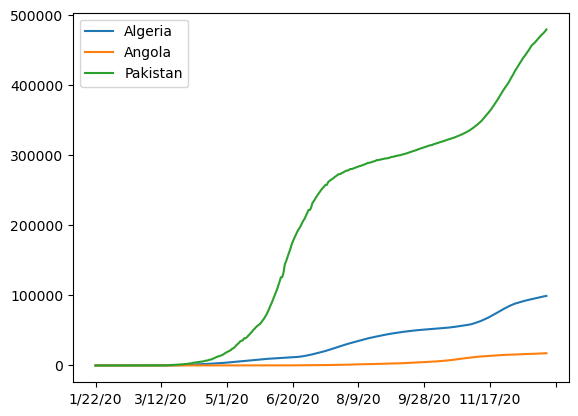

In [75]:
# Visualise data related to countries
corona_dataset_aggregated.loc["Algeria"].plot()

corona_dataset_aggregated.loc["Angola"].plot()

corona_dataset_aggregated.loc["Pakistan"].plot()
plt.legend()

In [ ]:
# CASE STUDY 2

<Axes: >

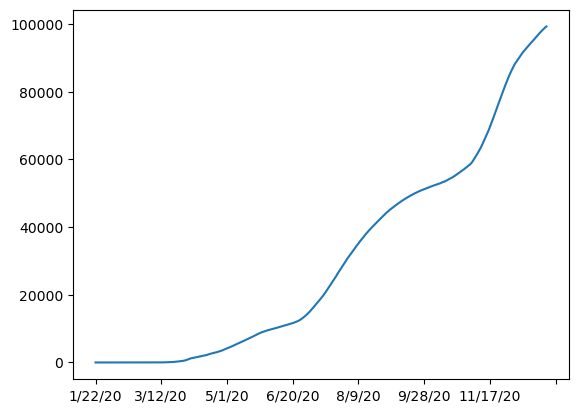

In [77]:
#calculate a good measure
corona_dataset_aggregated.loc["Algeria"].plot()

<Axes: >

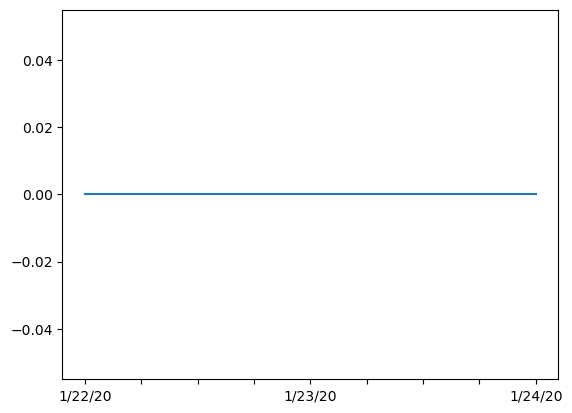

In [78]:
corona_dataset_aggregated.loc["Algeria"][:3].plot()

<Axes: >

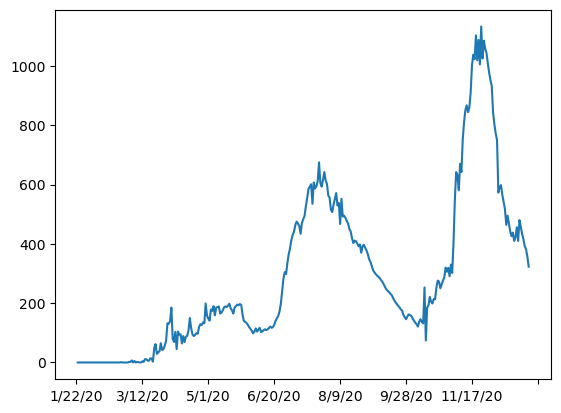

In [79]:
# Calculate the first derivate of the curve
corona_dataset_aggregated.loc["Algeria"].diff().plot()

In [80]:
# Maximun infection rate
corona_dataset_aggregated.loc["Algeria"].diff().max()

1133.0

In [81]:
corona_dataset_aggregated.loc["India"].diff().max()

97894.0

In [82]:
corona_dataset_aggregated.loc["Spain"].diff().max()

55019.0

In [83]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["Max_infection_rates"] = max_infection_rates

In [84]:
corona_dataset_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,Max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,50190,50433,50655,50810,50886,51039,51280,51350,51405,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,53814,54317,54827,55380,55755,56254,56572,57146,57727,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,96069,96549,97007,97441,97857,98249,98631,98988,99311,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,7633,7669,7699,7756,7806,7821,7875,7919,7983,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,16802,16931,17029,17099,17149,17240,17296,17371,17433,355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1420,1421,1432,1439,1440,1441,1451,1454,1456,50.0
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,125506,127376,129080,130598,131904,133093,134310,135459,136736,2516.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2087,2087,2092,2092,2092,2094,2096,2096,2097,116.0


In [85]:
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_infection_rates"])

In [86]:
corona_data

,Max_infection_rates
Country/Region,
Afghanistan,915.0
Albania,879.0
Algeria,1133.0
Andorra,299.0
Angola,355.0
...,...
Vietnam,50.0
West Bank and Gaza,2516.0
Yemen,116.0


In [119]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# importing the happiness dataset 2
happiness_report = pd.read_csv("2019.csv")

In [92]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [93]:
# drop the useless columns 
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]


In [94]:
happiness_report.drop(useless_cols, axis = 1, inplace = True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [95]:
happiness_report.set_index("Country or region", inplace = True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [ ]:
# CASE STUDY 3

In [96]:
corona_data.shape

(191, 1)

In [98]:
happiness_report.shape

(156, 4)

In [101]:
data = corona_data.join(happiness_report, how = "inner")
data

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,879.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,1281.0,0.960,1.427,0.805,0.154
Vietnam,50.0,0.741,1.346,0.851,0.543
Yemen,116.0,0.287,1.163,0.463,0.143
Zambia,915.0,0.578,1.058,0.426,0.431


In [102]:
# correlation 
data.corr()

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rates,1.000000,0.122183,0.088555,0.093681,-0.087245
GDP per capita,0.122183,1.000000,0.757521,0.859431,0.394799
Social support,0.088555,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.093681,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,-0.087245,0.394799,0.456317,0.423146,1.000000


In [109]:
data 

,Max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,879.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,1281.0,0.960,1.427,0.805,0.154
Vietnam,50.0,0.741,1.346,0.851,0.543
Yemen,116.0,0.287,1.163,0.463,0.143
Zambia,915.0,0.578,1.058,0.426,0.431


<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

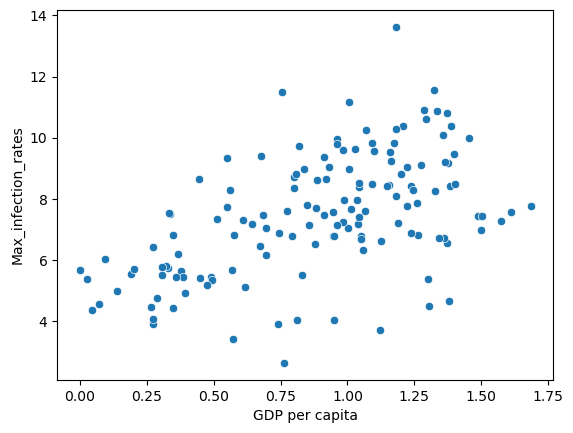

In [121]:
# Visualization
import seaborn as sns
import numpy as np  # Don't forget to import numpy for np.log

x = data["GDP per capita"]
y = data["Max_infection_rates"]

sns.scatterplot(x=x, y=np.log(y)) # logscaling

<Axes: xlabel='GDP per capita', ylabel='Max_infection_rates'>

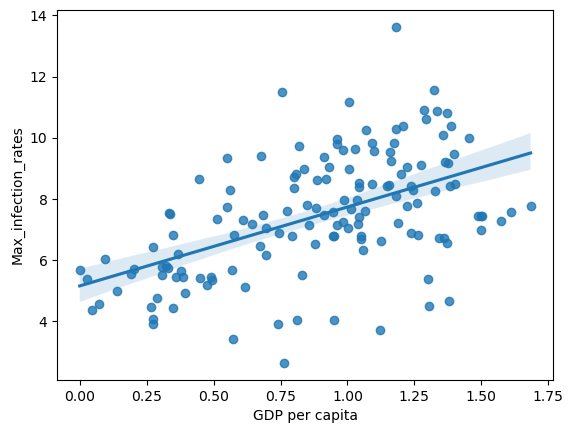

In [127]:
sns.regplot(x=x, y=np.log(y)) # Regression plot

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

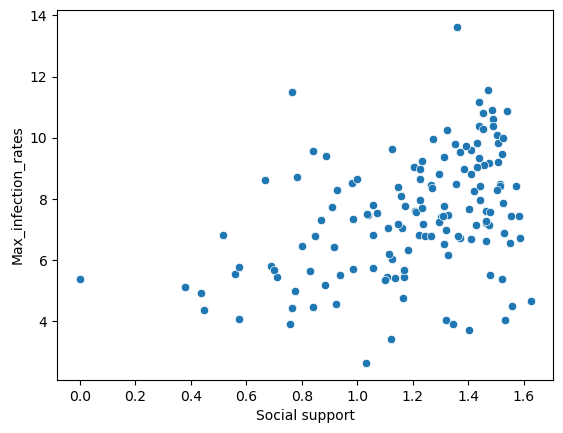

In [128]:
# Plot a scatterplot between social support and max_infection rate

x = data["Social support"]
y = data["Max_infection_rates"]

sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Social support', ylabel='Max_infection_rates'>

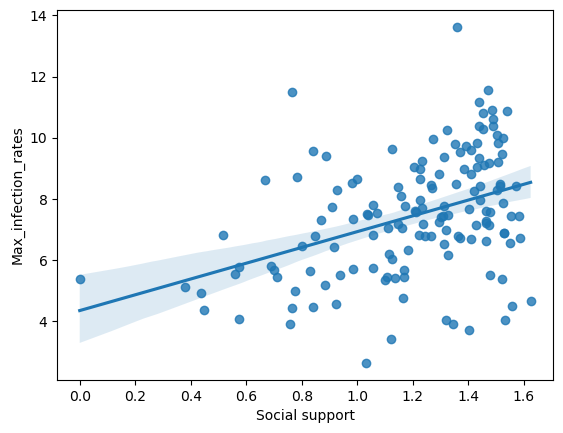

In [129]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

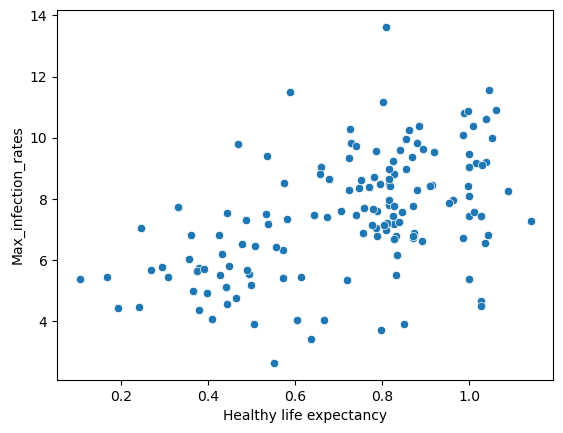

In [132]:
x = data["Healthy life expectancy"]
y = data["Max_infection_rates"]

sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='Max_infection_rates'>

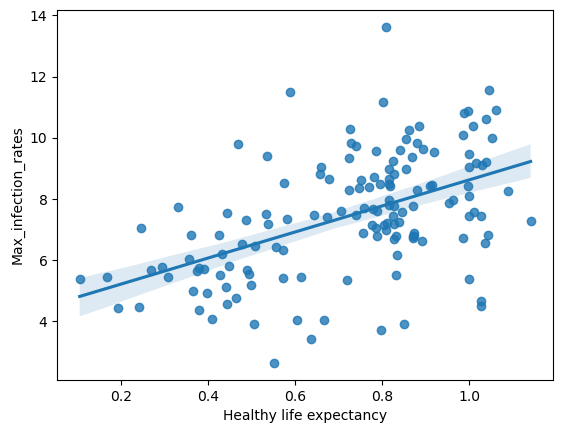

In [133]:
sns.regplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

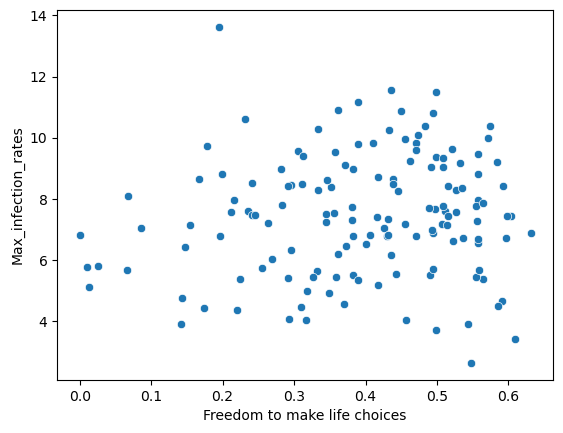

In [134]:
x = data["Freedom to make life choices"]
y = data["Max_infection_rates"]
sns.scatterplot(x=x, y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='Max_infection_rates'>

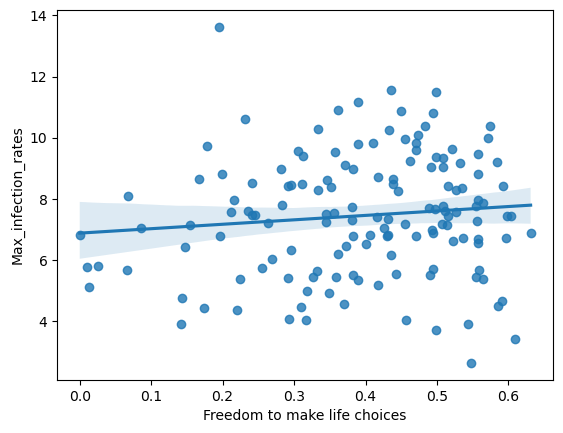

In [135]:
sns.regplot(x=x, y=np.log(y))